Prepare a prototype of a machine learning model for Zyfra. The company develops efficiency solutions for heavy industry.
The model should predict the amount of gold recovered from gold ore. You have the data on extraction and purification.
The model will help to optimize the production and eliminate unprofitable parameters.

Mined ore undergoes primary processing to get the ore mixture or rougher feed, which is the raw material for flotation (also known as the rougher process). After flotation, the material is sent to two-stage purification.

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gold_train = pd.read_csv('/datasets/gold_recovery_train.csv')
gold_test = pd.read_csv('/datasets/gold_recovery_test.csv')
gold_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
gold_train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [4]:
gold_train['date'] = pd.to_datetime(gold_train['date'])

In [5]:
gold_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [6]:
gold_test['date'] = pd.to_datetime(gold_test['date'])

In [7]:
gold_full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [8]:
gold_full['date'] = pd.to_datetime(gold_full['date'])

In [9]:
col_mapping_dict = {c[0]:c[1] for c in enumerate(gold_train.columns)}
col_mapping_dict

{0: 'date',
 1: 'final.output.concentrate_ag',
 2: 'final.output.concentrate_pb',
 3: 'final.output.concentrate_sol',
 4: 'final.output.concentrate_au',
 5: 'final.output.recovery',
 6: 'final.output.tail_ag',
 7: 'final.output.tail_pb',
 8: 'final.output.tail_sol',
 9: 'final.output.tail_au',
 10: 'primary_cleaner.input.sulfate',
 11: 'primary_cleaner.input.depressant',
 12: 'primary_cleaner.input.feed_size',
 13: 'primary_cleaner.input.xanthate',
 14: 'primary_cleaner.output.concentrate_ag',
 15: 'primary_cleaner.output.concentrate_pb',
 16: 'primary_cleaner.output.concentrate_sol',
 17: 'primary_cleaner.output.concentrate_au',
 18: 'primary_cleaner.output.tail_ag',
 19: 'primary_cleaner.output.tail_pb',
 20: 'primary_cleaner.output.tail_sol',
 21: 'primary_cleaner.output.tail_au',
 22: 'primary_cleaner.state.floatbank8_a_air',
 23: 'primary_cleaner.state.floatbank8_a_level',
 24: 'primary_cleaner.state.floatbank8_b_air',
 25: 'primary_cleaner.state.floatbank8_b_level',
 26: 'primary

In [10]:
gold_train.isna().sum().sort_values(ascending=False)/len(gold_train)

rougher.output.recovery                               0.152610
rougher.output.tail_ag                                0.133452
rougher.output.tail_sol                               0.133393
rougher.output.tail_au                                0.133393
secondary_cleaner.output.tail_sol                     0.117794
                                                        ...   
rougher.calculation.sulfate_to_au_concentrate         0.001601
rougher.calculation.floatbank10_sulfate_to_au_feed    0.001601
rougher.calculation.floatbank11_sulfate_to_au_feed    0.001601
primary_cleaner.input.feed_size                       0.000000
date                                                  0.000000
Length: 87, dtype: float64

In [11]:
gold_test.isna().sum().sort_values(ascending=False)/len(gold_test)

rougher.input.floatbank11_xanthate            0.060280
primary_cleaner.input.sulfate                 0.051571
primary_cleaner.input.depressant              0.048497
rougher.input.floatbank10_sulfate             0.043887
primary_cleaner.input.xanthate                0.028347
rougher.input.floatbank10_xanthate            0.021004
rougher.input.feed_sol                        0.011441
rougher.input.floatbank11_sulfate             0.009392
rougher.input.feed_rate                       0.006831
secondary_cleaner.state.floatbank3_a_air      0.005806
secondary_cleaner.state.floatbank2_b_air      0.003928
rougher.input.feed_size                       0.003757
secondary_cleaner.state.floatbank2_a_air      0.003415
rougher.state.floatbank10_e_air               0.002903
rougher.state.floatbank10_d_air               0.002903
rougher.state.floatbank10_a_air               0.002903
rougher.state.floatbank10_b_air               0.002903
rougher.state.floatbank10_c_air               0.002903
rougher.st

In [12]:
gold_full.isna().sum().sort_values(ascending=False)/len(gold_train)

rougher.output.recovery                     0.184994
rougher.output.tail_ag                      0.162337
rougher.output.tail_sol                     0.162278
rougher.output.tail_au                      0.162278
rougher.input.floatbank11_xanthate          0.133867
                                              ...   
primary_cleaner.state.floatbank8_b_level    0.002550
primary_cleaner.state.floatbank8_c_level    0.002550
primary_cleaner.state.floatbank8_d_level    0.002550
primary_cleaner.input.feed_size             0.000000
date                                        0.000000
Length: 87, dtype: float64

In [13]:
gold_test.fillna(method='ffill', inplace=True)
gold_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


When we look at NA values in the 3 sets, we see that some rows have almost 20% of values missing. We are told that parameters that are close in time tend to be similar, so I have used forward fill to fill these. In order to manually compute the recovery statistic below, I will drop NA values to avoid dividing by 0.

In [14]:
gold_train.dropna(inplace=True)
c = gold_train['rougher.output.concentrate_au']
f = gold_train['rougher.input.feed_au']
t = gold_train['rougher.output.tail_au']
recovery = ((c*(f-t))/(f*(c-t))) *100
recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 11017, dtype: float64

In [15]:
recovery.shape

(11017,)

In [16]:
gold_train['rougher.output.recovery'].shape

(11017,)

In [17]:
mean_absolute_error(gold_train['rougher.output.recovery'], recovery)

9.555596961987514e-15

In [18]:
sum(np.abs(recovery-gold_train['rougher.output.recovery']))/len(recovery)

9.555596961987514e-15

MAE is confirmed to be reasonably small (very close to zero) for the manually calculated recovery values. This tells us that this equation is a good model to predict the output of the process.

In [19]:
col_mapping_dict = {c[0]:c[1] for c in enumerate(gold_test.columns)}
col_mapping_dict

{0: 'date',
 1: 'primary_cleaner.input.sulfate',
 2: 'primary_cleaner.input.depressant',
 3: 'primary_cleaner.input.feed_size',
 4: 'primary_cleaner.input.xanthate',
 5: 'primary_cleaner.state.floatbank8_a_air',
 6: 'primary_cleaner.state.floatbank8_a_level',
 7: 'primary_cleaner.state.floatbank8_b_air',
 8: 'primary_cleaner.state.floatbank8_b_level',
 9: 'primary_cleaner.state.floatbank8_c_air',
 10: 'primary_cleaner.state.floatbank8_c_level',
 11: 'primary_cleaner.state.floatbank8_d_air',
 12: 'primary_cleaner.state.floatbank8_d_level',
 13: 'rougher.input.feed_ag',
 14: 'rougher.input.feed_pb',
 15: 'rougher.input.feed_rate',
 16: 'rougher.input.feed_size',
 17: 'rougher.input.feed_sol',
 18: 'rougher.input.feed_au',
 19: 'rougher.input.floatbank10_sulfate',
 20: 'rougher.input.floatbank10_xanthate',
 21: 'rougher.input.floatbank11_sulfate',
 22: 'rougher.input.floatbank11_xanthate',
 23: 'rougher.state.floatbank10_a_air',
 24: 'rougher.state.floatbank10_a_level',
 25: 'rougher.stat

In [20]:
col_mapping_dict = {c[0]:c[1] for c in enumerate(gold_full.columns)}
col_mapping_dict

{0: 'date',
 1: 'final.output.concentrate_ag',
 2: 'final.output.concentrate_pb',
 3: 'final.output.concentrate_sol',
 4: 'final.output.concentrate_au',
 5: 'final.output.recovery',
 6: 'final.output.tail_ag',
 7: 'final.output.tail_pb',
 8: 'final.output.tail_sol',
 9: 'final.output.tail_au',
 10: 'primary_cleaner.input.sulfate',
 11: 'primary_cleaner.input.depressant',
 12: 'primary_cleaner.input.feed_size',
 13: 'primary_cleaner.input.xanthate',
 14: 'primary_cleaner.output.concentrate_ag',
 15: 'primary_cleaner.output.concentrate_pb',
 16: 'primary_cleaner.output.concentrate_sol',
 17: 'primary_cleaner.output.concentrate_au',
 18: 'primary_cleaner.output.tail_ag',
 19: 'primary_cleaner.output.tail_pb',
 20: 'primary_cleaner.output.tail_sol',
 21: 'primary_cleaner.output.tail_au',
 22: 'primary_cleaner.state.floatbank8_a_air',
 23: 'primary_cleaner.state.floatbank8_a_level',
 24: 'primary_cleaner.state.floatbank8_b_air',
 25: 'primary_cleaner.state.floatbank8_b_level',
 26: 'primary

The test dataset doesn't include any of the final states, calculations, or the outputs of any of the stages. Which makes sense, because we would want the model to learn to predict outcomes from what goes in to each stage. The test dataset would only need the inputs, while we use the calculations, and actual outputs, to verify the accuracy of the model.

In [21]:
au_conc = gold_full.filter(['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au'])
sol_conc = gold_full.filter(['rougher.input.feed_sol', 'rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_sol'])
pb_conc = gold_full.filter(['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb'])
ag_conc = gold_full.filter(['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag'])

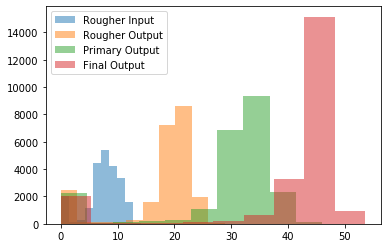

In [22]:
plt.hist(au_conc['rougher.input.feed_au'], alpha=0.5, label='Rougher Input')
plt.hist(au_conc['rougher.output.concentrate_au'], alpha=0.5, label='Rougher Output')
plt.hist(au_conc['primary_cleaner.output.concentrate_au'], alpha=0.5, label='Primary Output')
plt.hist(au_conc['final.output.concentrate_au'], alpha=0.5, label='Final Output')
plt.legend(loc='upper left')
plt.show()

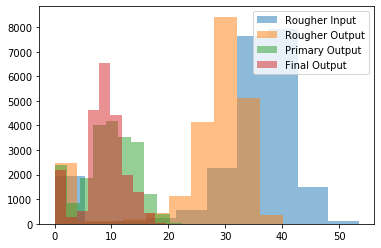

In [23]:
plt.hist(sol_conc['rougher.input.feed_sol'], alpha=0.5, label='Rougher Input')
plt.hist(sol_conc['rougher.output.concentrate_sol'], alpha=0.5, label='Rougher Output')
plt.hist(sol_conc['primary_cleaner.output.concentrate_sol'], alpha=0.5, label='Primary Output')
plt.hist(sol_conc['final.output.concentrate_sol'], alpha=0.5, label='Final Output')
plt.legend(loc='upper right')
plt.show()

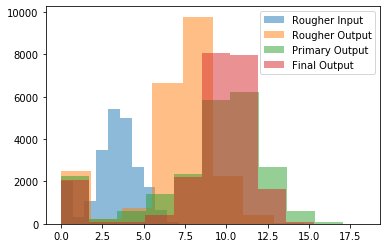

In [24]:
plt.hist(pb_conc['rougher.input.feed_pb'], alpha=0.5, label='Rougher Input')
plt.hist(pb_conc['rougher.output.concentrate_pb'], alpha=0.5, label='Rougher Output')
plt.hist(pb_conc['primary_cleaner.output.concentrate_pb'], alpha=0.5, label='Primary Output')
plt.hist(pb_conc['final.output.concentrate_pb'], alpha=0.5, label='Final Output')
plt.legend(loc='upper right')
plt.show()

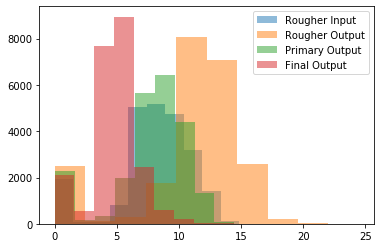

In [25]:
plt.hist(ag_conc['rougher.input.feed_ag'], alpha=0.5, label='Rougher Input')
plt.hist(ag_conc['rougher.output.concentrate_ag'], alpha=0.5, label='Rougher Output')
plt.hist(ag_conc['primary_cleaner.output.concentrate_ag'], alpha=0.5, label='Primary Output')
plt.hist(ag_conc['final.output.concentrate_ag'], alpha=0.5, label='Final Output')
plt.legend(loc='upper right')
plt.show()

When we look at how concentrations change throughout the process, the most important to observe is the Au (gold) concentration. We can see that the concentration grows as the ore moves through the process, which aligns with the goal to purify and improve the concentration of gold with each step. The other minerals do not show as clear a progress, but they do not mimic the Au process. This tells us that the process is prioritizing the purification of Au, and that each different step assists with reducing a different contaminant.

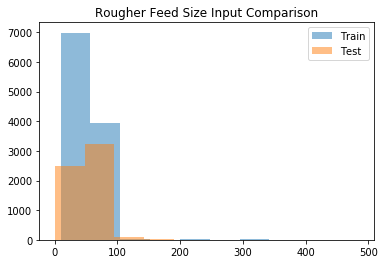

In [26]:
plt.hist(gold_train['rougher.input.feed_size'], alpha=0.5, label='Train')
plt.hist(gold_test['rougher.input.feed_size'], alpha=0.5, label='Test')
plt.title('Rougher Feed Size Input Comparison')
plt.legend(loc='upper right')
plt.show()

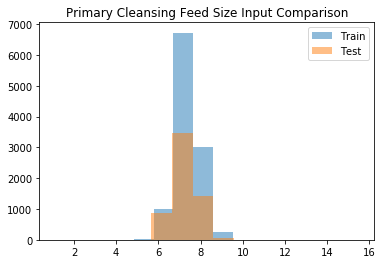

In [27]:
plt.hist(gold_train['primary_cleaner.input.feed_size'], alpha=0.5, label='Train')
plt.hist(gold_test['primary_cleaner.input.feed_size'], alpha=0.5, label='Test')
plt.title('Primary Cleansing Feed Size Input Comparison')
plt.legend(loc='upper right')
plt.show()

Feed size has approximately similar distributions between train and test sets, so models should be accurate.

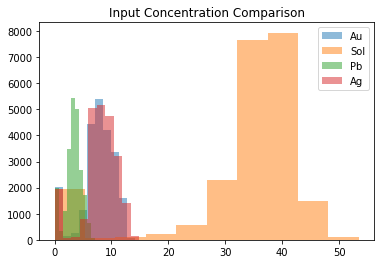

In [28]:
plt.hist(gold_full['rougher.input.feed_au'], alpha=0.5, label='Au')
plt.hist(gold_full['rougher.input.feed_sol'], alpha=0.5, label='Sol')
plt.hist(gold_full['rougher.input.feed_pb'], alpha=0.5, label='Pb')
plt.hist(gold_full['rougher.input.feed_ag'], alpha=0.5, label='Ag')
plt.title('Input Concentration Comparison')
plt.legend(loc='upper right')
plt.show()

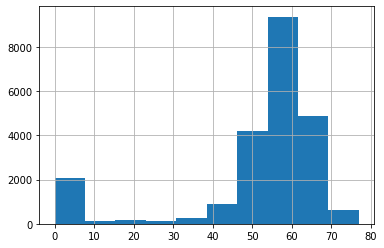

In [29]:
rougher_input = ['rougher.input.feed_au', 'rougher.input.feed_sol', 'rougher.input.feed_pb', 'rougher.input.feed_ag']
gold_full[rougher_input].sum(1).hist()

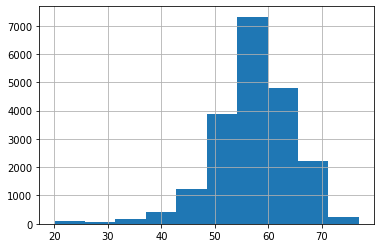

In [30]:
gold_full['rougher_input'] = gold_full[rougher_input].sum(1)
gold_full.drop(gold_full[gold_full['rougher_input'] <= 20].index, inplace=True)
gold_full['rougher_input'].hist()

In [31]:
gold_train['rougher_input'] = gold_train[rougher_input].sum(1)
gold_train.drop(gold_train[gold_train['rougher_input'] <= 20].index, inplace=True)

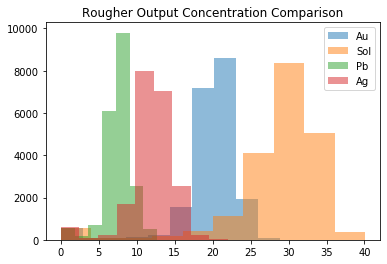

In [32]:
plt.hist(gold_full['rougher.output.concentrate_au'], alpha=0.5, label='Au')
plt.hist(gold_full['rougher.output.concentrate_sol'], alpha=0.5, label='Sol')
plt.hist(gold_full['rougher.output.concentrate_pb'], alpha=0.5, label='Pb')
plt.hist(gold_full['rougher.output.concentrate_ag'], alpha=0.5, label='Ag')
plt.title('Rougher Output Concentration Comparison')
plt.legend(loc='upper right')
plt.show()

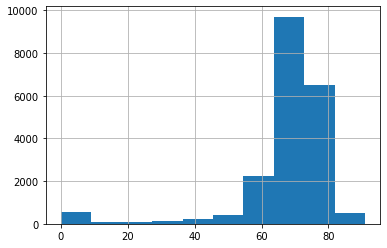

In [33]:
rougher_output = ['rougher.output.concentrate_au', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_ag']
gold_full[rougher_output].sum(1).hist()

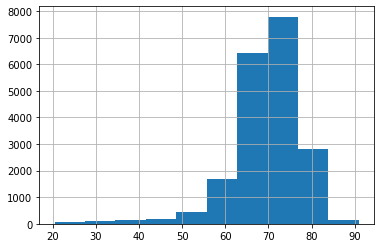

In [34]:
gold_full['rougher_output'] = gold_full[rougher_output].sum(1)
gold_full.drop(gold_full[gold_full['rougher_output'] <= 20].index, inplace=True)
gold_train['rougher_output'] = gold_train[rougher_output].sum(1)
gold_train.drop(gold_train[gold_train['rougher_output'] <= 20].index, inplace=True)
gold_full['rougher_output'].hist()

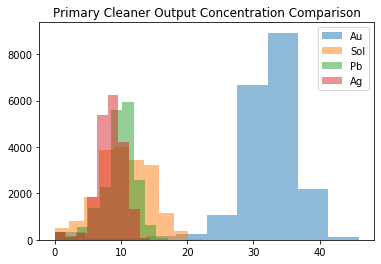

In [35]:
plt.hist(gold_full['primary_cleaner.output.concentrate_au'], alpha=0.5, label='Au')
plt.hist(gold_full['primary_cleaner.output.concentrate_sol'], alpha=0.5, label='Sol')
plt.hist(gold_full['primary_cleaner.output.concentrate_pb'], alpha=0.5, label='Pb')
plt.hist(gold_full['primary_cleaner.output.concentrate_ag'], alpha=0.5, label='Ag')
plt.title('Primary Cleaner Output Concentration Comparison')
plt.legend(loc='upper right')
plt.show()

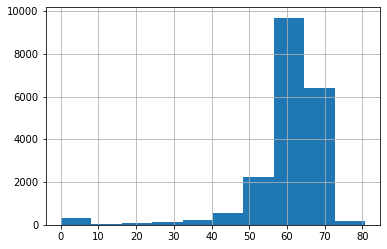

In [36]:
primary_cleaner_output = ['primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_ag']
gold_full[primary_cleaner_output].sum(1).hist()

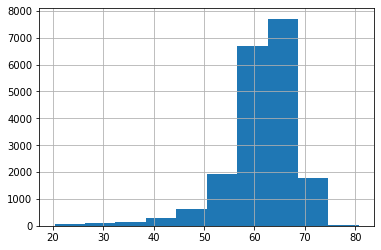

In [37]:
gold_full['primary_cleaner_output'] = gold_full[primary_cleaner_output].sum(1)
gold_full.drop(gold_full[gold_full['primary_cleaner_output'] <= 20].index, inplace=True)
gold_train['primary_cleaner_output'] = gold_train[primary_cleaner_output].sum(1)
gold_train.drop(gold_train[gold_train['primary_cleaner_output'] <= 20].index, inplace=True)
gold_full['primary_cleaner_output'].hist()

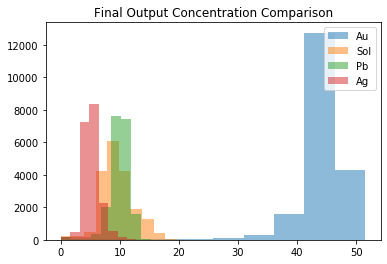

In [38]:
plt.hist(gold_full['final.output.concentrate_au'], alpha=0.5, label='Au')
plt.hist(gold_full['final.output.concentrate_sol'], alpha=0.5, label='Sol')
plt.hist(gold_full['final.output.concentrate_pb'], alpha=0.5, label='Pb')
plt.hist(gold_full['final.output.concentrate_ag'], alpha=0.5, label='Ag')
plt.title('Final Output Concentration Comparison')
plt.legend(loc='upper right')
plt.show()

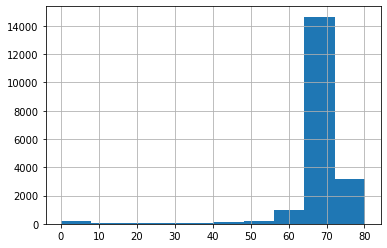

In [39]:
final_output = ['final.output.concentrate_au', 'final.output.concentrate_sol', 'final.output.concentrate_pb', 'final.output.concentrate_ag']
gold_full[final_output].sum(1).hist()

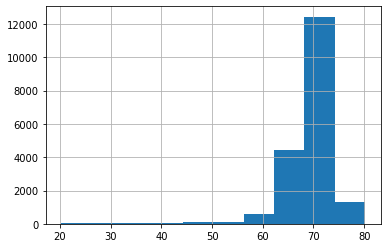

In [40]:
gold_full['final_output'] = gold_full[final_output].sum(1)
gold_full.drop(gold_full[gold_full['final_output'] <= 20].index, inplace=True)
gold_full['final_output'].hist()

It does appear that there are some outliers of 0 in all of our concentrations, these may just be missing values or erroneous values. They have been dropped from the full dataset, and also from the train dataset to avoid mistraining the model.

In [41]:
def smape(y_true, y_pred):
    return (1/(len(y_true)))*np.sum((np.abs(y_true-y_pred))/(np.abs(y_true)+np.abs(y_pred))/2)*100

In [42]:
def finalsmape(smape_rough, smape_final):
    return .25* smape_rough + .75* smape_final

In [43]:
smape_rough = smape(gold_train['rougher.output.recovery'], recovery)

In [44]:
c = gold_train['final.output.concentrate_au']
f = gold_train['rougher.output.concentrate_au']
t = gold_train['final.output.tail_au']
recovery = ((c*(f-t))/(f*(c-t))) *100
smape_final = smape(gold_train['final.output.recovery'], recovery)

In [45]:
finalsmape(smape_rough, smape_final)

5.856398012142628

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

features = gold_train[gold_test.columns].drop(['date'], axis=1)
target = gold_train[['rougher.output.recovery', 'final.output.recovery']]
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=.25, random_state=42)
gold_test_target = gold_test.merge(gold_full, on='date', how='inner')[['date', 'rougher.output.recovery', 'final.output.recovery']]
gold_test = gold_test.merge(gold_test_target, on='date', how='inner')
gold_test_target = gold_test_target.drop(['date'], axis=1)
gold_test = gold_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

In [53]:
gold_test_target

,rougher.output.recovery,final.output.recovery
0,89.993421,70.273583
1,88.089657,68.910432
2,88.412756,68.143213
3,87.360133,67.776393
4,83.236367,61.467078
...,...,...
5154,95.172585,68.919891
5155,94.575036,68.440582
5156,93.018138,67.092759
5157,92.599042,68.061186


In [52]:
gold_test

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5154,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,-499.599127,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5155,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,-503.587739,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5156,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,-520.667442,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5157,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,-487.479567,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [86]:
LinReg = LinearRegression()
LinReg.fit(features_train, target_train)
LinRegPredict=pd.DataFrame(LinReg.predict(features_test))
smape_rough = smape(target_test['rougher.output.recovery'], LinRegPredict[0])
smape_final = smape(target_test['final.output.recovery'], LinRegPredict[1])
finalsmape(smape_rough, smape_final)

0.45784446552154245

In [63]:
for estim in range(5, 51, 5):
    for depth in range(5, 20, 5):
        RanFor = RandomForestRegressor(n_estimators=estim, max_depth=depth, random_state=12345)
        RanFor.fit(features_train, target_train)
        RanForPredict = RanFor.predict(features_test)
        smape_rough = smape(target_test['rougher.output.recovery'], RanForPredict[:,0])
        smape_final = smape(target_test['final.output.recovery'], RanForPredict[:,1])
        total_smape = finalsmape(smape_rough, smape_final)
        print('N-estimator:', estim, ' | Depth:', depth, ' | sMAPE:', total_smape)

N-estimator: 5  | Depth: 5  | sMAPE: 1.5571076204997591
N-estimator: 5  | Depth: 10  | sMAPE: 1.3897854182543772
N-estimator: 5  | Depth: 15  | sMAPE: 1.3426019169488914
N-estimator: 10  | Depth: 5  | sMAPE: 1.5629710859071269
N-estimator: 10  | Depth: 10  | sMAPE: 1.3481799513693564
N-estimator: 10  | Depth: 15  | sMAPE: 1.2718503085106792
N-estimator: 15  | Depth: 5  | sMAPE: 1.5604005124628415
N-estimator: 15  | Depth: 10  | sMAPE: 1.3357094442175526
N-estimator: 15  | Depth: 15  | sMAPE: 1.249945280817667
N-estimator: 20  | Depth: 5  | sMAPE: 1.5558131352357407
N-estimator: 20  | Depth: 10  | sMAPE: 1.3267885572538463
N-estimator: 20  | Depth: 15  | sMAPE: 1.2380285277364578
N-estimator: 25  | Depth: 5  | sMAPE: 1.557714292473178
N-estimator: 25  | Depth: 10  | sMAPE: 1.3207788988866975
N-estimator: 25  | Depth: 15  | sMAPE: 1.231689094585287
N-estimator: 30  | Depth: 5  | sMAPE: 1.5550407275282083
N-estimator: 30  | Depth: 10  | sMAPE: 1.319476847625792
N-estimator: 30  | Depth: 1

In [87]:
for depth in range(1, 41):
    DecTree = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    DecTree.fit(features_train, target_train)
    DecTreePredict = DecTree.predict(features_test)
    smape_rough = smape(target_test['rougher.output.recovery'], DecTreePredict[:,0])
    smape_final = smape(target_test['final.output.recovery'], DecTreePredict[:,1])
    total_smape = finalsmape(smape_rough, smape_final)
    print('Depth:', depth, ' | sMAPE:', total_smape)

Depth: 1  | sMAPE: 1.8904854399935058
Depth: 2  | sMAPE: 1.8007765642156657
Depth: 3  | sMAPE: 1.7316619050914737
Depth: 4  | sMAPE: 1.655258829244849
Depth: 5  | sMAPE: 1.6214803590320255
Depth: 6  | sMAPE: 1.6341874432713217
Depth: 7  | sMAPE: 1.5934930915221932
Depth: 8  | sMAPE: 1.6114083163084576
Depth: 9  | sMAPE: 1.5856983317329798
Depth: 10  | sMAPE: 1.5492788264586281
Depth: 11  | sMAPE: 1.5828456042477665
Depth: 12  | sMAPE: 1.5423959809095495
Depth: 13  | sMAPE: 1.5581503908115497
Depth: 14  | sMAPE: 1.5890104319485339
Depth: 15  | sMAPE: 1.5866599430750707
Depth: 16  | sMAPE: 1.6389366497653821
Depth: 17  | sMAPE: 1.650925478624972
Depth: 18  | sMAPE: 1.6623329328419585
Depth: 19  | sMAPE: 1.732813872177719
Depth: 20  | sMAPE: 1.699985476513528
Depth: 21  | sMAPE: 1.6744488210163637
Depth: 22  | sMAPE: 1.7137702353462976
Depth: 23  | sMAPE: 1.732146692691994
Depth: 24  | sMAPE: 1.7144717037420194
Depth: 25  | sMAPE: 1.6658849011075436
Depth: 26  | sMAPE: 1.72046869054606
De

In [60]:
mean_absolute_error(target_test, LinReg.predict(features_test))

3.924412492800389

In [64]:
predictions0 = pd.Series(target_test.iloc[:,0].mean(), index=target_test.index)
predictions1 = pd.Series(target_test.iloc[:,1].mean(), index=target_test.index)
predictions = pd.concat([predictions0, predictions1], axis=1)
predictions

,0,1
1888,84.257823,66.75486
2913,84.257823,66.75486
2862,84.257823,66.75486
9329,84.257823,66.75486
324,84.257823,66.75486
...,...,...
7592,84.257823,66.75486
3981,84.257823,66.75486
5625,84.257823,66.75486
12172,84.257823,66.75486


In [65]:
mean_absolute_error(target_test, predictions)

5.790588358203398

In [88]:
smape_rough = smape(target_test['rougher.output.recovery'], predictions.iloc[:,0])
smape_final = smape(target_test['final.output.recovery'], predictions.iloc[:,1])
finalsmape(smape_rough, smape_final)

2.1674310014318103

When we compare sMAPE values across various methods of determining recovery, we can see that LinearRegressor gives us the best predictions, with the lowest sMAPE score. With the provided equation to determine recovery as a baseline, our sMAPE score was 5.85, much higher than the score of 0.45 that LinearRegressor got. Estimating with the mean recoveries as a baseline, the MAE is 5.79, so we can see that LinearRegressor is more effective than the baseline prediction. sMAPE with the baseline predictions is also 2.1, which is still higher than LinearRegressor.

In [73]:
linreg_valid = LinReg.predict(gold_test)

In [84]:
smape_rough = smape(gold_test_target['rougher.output.recovery'], linreg_valid[:,0])
smape_final = smape(gold_test_target['final.output.recovery'], linreg_valid[:,1])
finalsmape(smape_rough, smape_final)

1.793065917135099

Final sMAPE value with the chosen model is 1.79, which is still a very good score, and lower than many of the trained models. 